In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import random
import sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

# np.random.seed(7)

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# print('Keras version : ', keras.__version__)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)


Python version :  3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
TensorFlow version :  1.14.0


In [8]:
img_rows = 32
img_cols = 32 # 이미지 사이즈 설정

#https://www.cs.toronto.edu/~kriz/cifar.html
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # mnist cifar10

input_shape = (img_rows, img_cols, 3)   #이미지 shape 설정 : 가로, 세로, 채널(흑백 -> 1, 컬러RGB -> 3)

print(x_train.shape[0])
print(x_test.shape[0])
#train -> 5만개
#test -> 1만개

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)   # (50000, row, col, 3) (이미지개수, 가로, 세로, 색상)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

# print(x_train[0])

x_train = x_train.astype('float32')/255.0  # 픽셀은 0에서 255의 값을 가지고 있음
x_test = x_test.astype('float32')/255.0    #소숫점 255로 나눠주면 계산이 용이해짐


# print(x_train[0])


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')






num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes) #0에서부터 9까지의 카테고리를 정리해줌
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

50000
10000
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [18]:

batch_size = 128


model = Sequential() #차례대로 넣는다

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', # 히든레이어32개, 5x5사이즈 stride 1x1, 패딩있음
                  activation='relu', # relu함수
                  input_shape=input_shape)) #콘볼루션 실행
model.add(Activation('elu')) #지수 선형 활성화 https://keras.io/activations/
model.add(BatchNormalization()) #평균 활성화를 0에 가깝게 유지하고 활성화 표준 편차를 1에 가깝게 유지하는 변환을 적용. 드롭아웃의 역할도 함.

model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.3))


model.add(Flatten())
#model.add(Dense(256, activation='relu')) # 뉴런의수
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#용어사전
#https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

#GPU변경
#https://colab.research.google.com/notebooks/welcome.ipynb

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 32)       

In [19]:
epochs = 12 # 학습을 몇 번 할 것 인가?
print(">>>> 학습횟수 :", epochs, "회")

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test)) #학습이 잘 되었는지 검증하는 것, 학습이 개선되고 있으면 loss가 떨어짐

>>>> 학습횟수 : 12 회
Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 17s 347us/sample - loss: 5.0455 - acc: 0.4173 - val_loss: 5.6388 - val_acc: 0.1654
Epoch 2/12
50000/50000 [==============================] - 17s 335us/sample - loss: 2.1171 - acc: 0.5621 - val_loss: 1.9174 - val_acc: 0.4929
Epoch 3/12
50000/50000 [==============================] - 17s 335us/sample - loss: 1.6040 - acc: 0.6344 - val_loss: 1.3269 - val_acc: 0.6189
Epoch 4/12
50000/50000 [==============================] - 17s 335us/sample - loss: 1.4052 - acc: 0.6693 - val_loss: 1.1135 - val_acc: 0.6584
Epoch 5/12
50000/50000 [==============================] - 17s 334us/sample - loss: 1.0896 - acc: 0.7118 - val_loss: 1.3552 - val_acc: 0.6524
Epoch 6/12
50000/50000 [==============================] - 17s 335us/sample - loss: 0.9723 - acc: 0.7262 - val_loss: 0.9283 - val_acc: 0.6965
Epoch 7/12
50000/50000 [==============================] - 17s 335us/sample - loss: 0.78

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) #10000장의 테스트 중 9905장이 정확함
# 이미지파일, 모델 변경해서 0.7이상 만들어오기

Test loss: 0.943070507144928
Test accuracy: 0.7157


/usr/lib/python3.6/random.py
잘못 학습된 샘플 4가지


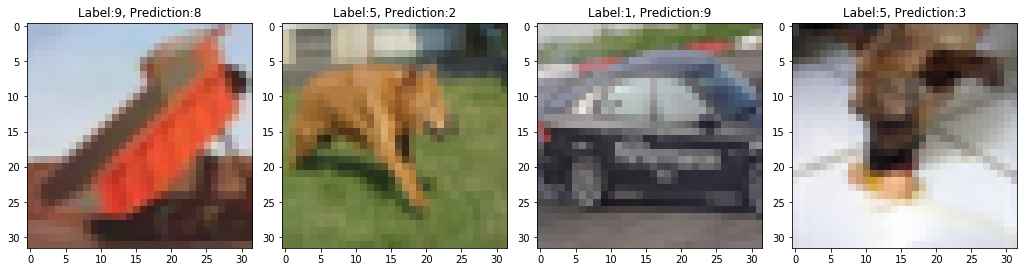

labels = [0='airplane', 1='automobile', 2='bird', 3='cat', 4='deer', 5='dog', 6='frog', 7'horse', 8='ship', 9='truck']


In [42]:


print (random.__file__)

import matplotlib.pylab as plt

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

wr_samples = random.choices(population=wrong_result, k=4)

count = 0
nrows = ncols = 9

plt.figure(figsize=(32,32))



for n in wr_samples :
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n], interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

print("잘못 학습된 샘플 4가지")

plt.tight_layout()
plt.show()

print("labels = [0='airplane', 1='automobile', 2='bird', 3='cat', 4='deer', 5='dog', 6='frog', 7'horse', 8='ship', 9='truck']")

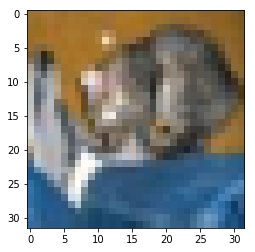

The Answer is  [3]
labels = [0='airplane', 1='automobile', 2='bird', 3='cat', 4='deer', 5='dog', 6='frog', 7'horse', 8='ship', 9='truck']


In [48]:
import matplotlib.pylab as plt
n = 0
plt.imshow(x_test[n], interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 32, 32, 3))))
print("labels = [0='airplane', 1='automobile', 2='bird', 3='cat', 4='deer', 5='dog', 6='frog', 7'horse', 8='ship', 9='truck']")